In [1]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
#Import Data for presidents and opioid information
df1 = pd.read_csv('data/presidents.csv')
df2 = pd.read_csv('data/seizures_1.csv')

In [3]:
#Print President information to see what it looks like
df1.head(2)

,President Name,Years In Office,Number,Party
0,George Washington,1789-1797,1st,Federalist
1,John Adams,1797-1801,2nd,Federalist


In [4]:
#Count Presidents - looking for blank values
df1.count()

President Name     46
Years In Office    46
Number             46
Party              46
dtype: int64

In [5]:
#Renaming the President Name column to President (in order to make the merge simpler later on)
df1=df1.rename({"President Name":"President"},axis=1)
#Printing the President data set to view the renamed column
df1.head(2)

,President,Years In Office,Number,Party
0,George Washington,1789-1797,1st,Federalist
1,John Adams,1797-1801,2nd,Federalist


In [6]:
#Printing the Drug data set to see what columns it has
df2.head(2)

,Region,Country,ISO Code,Drug Group,Drug,Year,KG Equivalent
0,Africa,Algeria,DZA,Cannabis-type,Marijuana (herb),1970,141.0
1,Africa,Algeria,DZA,Cannabis-type,Hashish (resin),1970,140.0


In [7]:
#Renaming the Year to clarify what it means
df2=df2.rename({"Year":"Year of Drug Seizure"},axis=1)
#Printing the data set to view the renamed column
df2[:2]

,Region,Country,ISO Code,Drug Group,Drug,Year of Drug Seizure,KG Equivalent
0,Africa,Algeria,DZA,Cannabis-type,Marijuana (herb),1970,141.0
1,Africa,Algeria,DZA,Cannabis-type,Hashish (resin),1970,140.0


In [8]:
#Filter for USA in Drug info. (1980-2019)
#us_df=df2[(df2["ISO Code"]=="USA")&(df2["Drug Group"]=="Opioids")].sort_values('Year').copy()

In [9]:
#us_df.head(2)

In [10]:
#Filter for USA in Drug info.
us_opioids = df2[(df2["ISO Code"]=="USA")&(df2["Drug Group"]=="Opioids")]
#Print the USA Drug info.
us_opioids

,Region,Country,ISO Code,Drug Group,Drug,Year of Drug Seizure,KG Equivalent
715,Americas,United States of America,USA,Opioids,Heroin,1980,229.970993
716,Americas,United States of America,USA,Opioids,Opium,1980,20.000000
1434,Americas,United States of America,USA,Opioids,Heroin,1981,151.000000
1435,Americas,United States of America,USA,Opioids,Opium,1981,69.000000
1436,Americas,United States of America,USA,Opioids,Other illicit opioids,1981,NaN
...,...,...,...,...,...,...,...
50813,Americas,United States of America,USA,Opioids,Pharmaceutical opioids,2019,64.184351
50814,Americas,United States of America,USA,Opioids,Pharmaceutical opioids,2019,2.042000
50815,Americas,United States of America,USA,Opioids,Pharmaceutical opioids,2019,0.005600
50816,Americas,United States of America,USA,Opioids,Pharmaceutical opioids,2019,840.456000


In [11]:
#Remove redundant data for USA Opioid info. because once filtered all the information for Country, Region are USA
us_opioids = df2[(df2["ISO Code"]=="USA")&(df2["Drug Group"]=="Opioids")]\
.sort_values('Year of Drug Seizure').drop(['Country','Drug Group','ISO Code','Region'],axis=1)

In [12]:
#Count USA Opioid information to see if there are blanks
us_opioids.count()

Drug                    254
Year of Drug Seizure    254
KG Equivalent           253
dtype: int64

In [13]:
#Drop the missing information in 'KG Equivalent'
us_opioids.dropna(inplace=True)
#Check the updated count 
us_opioids.count()

Drug                    253
Year of Drug Seizure    253
KG Equivalent           253
dtype: int64

In [14]:
#Look at the Presidents needed for the time period 1980-2020
p_df=df1.iloc[38:45]
p_df

,President,Years In Office,Number,Party
38,James (Jimmy) Carter,1977-1981,39th,Democratic
39,Ronald Reagan,1981-1989,40th,Republican
40,George H.W. Bush,1989-1993,41st,Republican
41,William (Bill) Clinton,1993-2001,42nd,Democratic
42,George W. Bush,2001-2009,43rd,Republican
43,Barack Obama,2009-2017,44th,Democratic
44,Donald Trump,2017-2021,45th,Republican


In [15]:
#The data from drug seizure df2 looks like it only spans 1980-2019
us_opioids["Year of Drug Seizure"]

715      1980
716      1980
1434     1981
1435     1981
2111     1982
         ... 
50809    2019
50808    2019
50816    2019
50811    2019
50817    2019
Name: Year of Drug Seizure, Length: 253, dtype: int64

In [16]:
#Create an additional column for President in the Opioid Data
#Using Bins to connect the seizure to a president's term in office
us_opioids['President'] = pd.cut(us_opioids["Year of Drug Seizure"],[1977,1981,1989,1993,2001,2009,2017,2021], labels=p_df['President'])

In [17]:
p_df[:2]

,President,Years In Office,Number,Party
38,James (Jimmy) Carter,1977-1981,39th,Democratic
39,Ronald Reagan,1981-1989,40th,Republican


In [18]:
us_opioids[:10]

,Drug,Year of Drug Seizure,KG Equivalent,President
715,Heroin,1980,229.970993,James (Jimmy) Carter
716,Opium,1980,20.000000,James (Jimmy) Carter
1434,Heroin,1981,151.000000,James (Jimmy) Carter
1435,Opium,1981,69.000000,James (Jimmy) Carter
2111,Heroin,1982,275.985992,Ronald Reagan
2112,Illicit morphine,1982,0.033000,Ronald Reagan
2113,Opium,1982,120.000000,Ronald Reagan
2852,Heroin,1983,300.372009,Ronald Reagan
2853,Opium,1983,16.087000,Ronald Reagan
2854,Other illicit opioids,1983,0.080625,Ronald Reagan


In [29]:
uso_merged=us_opioids.merge(p_df,on="President")[["President","Party","Year of Drug Seizure","Years In Office","Drug","KG Equivalent"]]

In [20]:
#us_df['President'] = pd.cut(us_df.Year, [1977,1981,1989,1993,2001,2009,2017,2021])

In [21]:
#us_opioids[us_opioids.Year==1990]

In [34]:
uso_merged.to_csv('data/uso_merged.csv')

In [35]:
df3= pd.read_csv('data/uso_merged.csv')

In [36]:
df3.head()

,Unnamed: 0,President,Party,Year of Drug Seizure,Years In Office,Drug,KG Equivalent
0,0,James (Jimmy) Carter,Democratic,1980,1977-1981,Heroin,229.970993
1,1,James (Jimmy) Carter,Democratic,1980,1977-1981,Opium,20.000000
2,2,James (Jimmy) Carter,Democratic,1981,1977-1981,Heroin,151.000000
3,3,James (Jimmy) Carter,Democratic,1981,1977-1981,Opium,69.000000
4,4,Ronald Reagan,Republican,1982,1981-1989,Heroin,275.985992


In [118]:
#Sum of KG column by president
KG_summed = df3.groupby(['President', 'Party', 'Color'])['KG Equivalent'].sum().reset_index()
#KG_summed ['Party']= {'Democratic': 'blue', 'Republican': 'red'}
KG_summed

,President,Party,Color,KG Equivalent
0,Barack Obama,Democratic,blue,115894.150856
1,Donald Trump,Republican,red,26780.535461
2,George H.W. Bush,Republican,red,7033.976473
3,George W. Bush,Republican,red,51986.130110
4,James (Jimmy) Carter,Democratic,blue,469.970993
5,Ronald Reagan,Republican,red,4252.125530
6,William (Bill) Clinton,Democratic,blue,14232.967412


In [120]:
#Set Color
color= {'Democratic': 'blue', 'Republican': 'red'}
color_mapping=KG_summed['Party'].map(color)
KG_summed['Color'] = KG_summed['Party'].map(color_mapping)

KG_summed

,President,Party,Color,KG Equivalent
0,Barack Obama,Democratic,NaN,115894.150856
1,Donald Trump,Republican,NaN,26780.535461
2,George H.W. Bush,Republican,NaN,7033.976473
3,George W. Bush,Republican,NaN,51986.130110
4,James (Jimmy) Carter,Democratic,NaN,469.970993
5,Ronald Reagan,Republican,NaN,4252.125530
6,William (Bill) Clinton,Democratic,NaN,14232.967412


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Barack Obama'),
  Text(1, 0, 'Donald Trump'),
  Text(2, 0, 'George H.W. Bush'),
  Text(3, 0, 'George W. Bush'),
  Text(4, 0, 'James (Jimmy) Carter'),
  Text(5, 0, 'Ronald Reagan'),
  Text(6, 0, 'William (Bill) Clinton')])

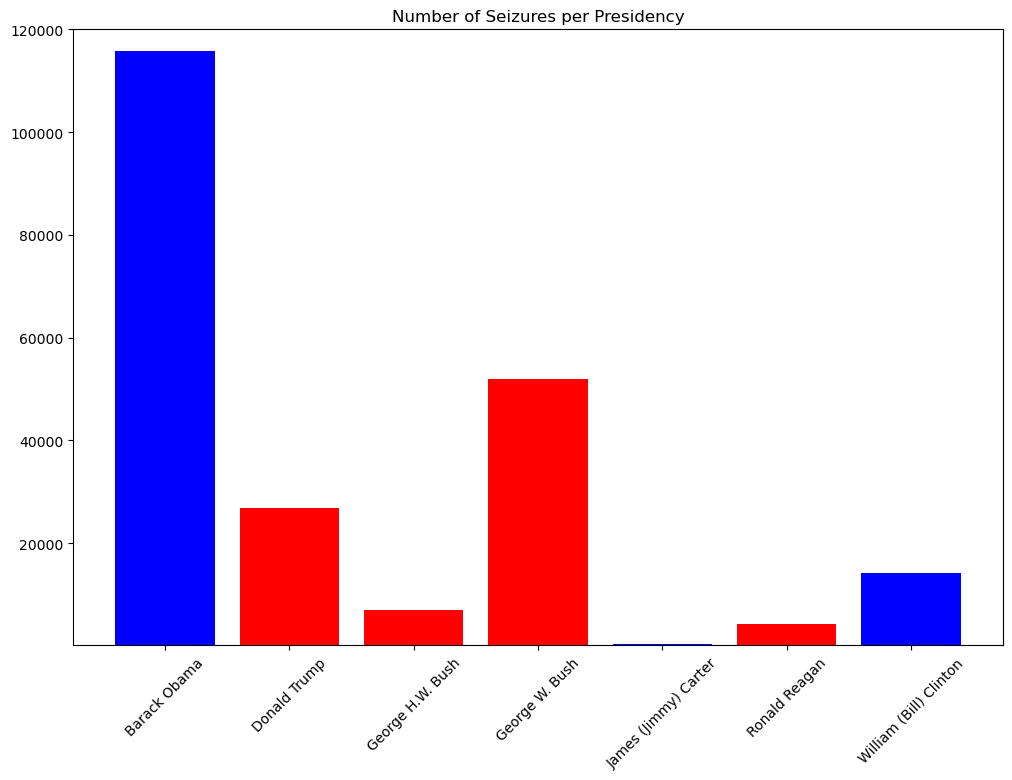

In [124]:
#Create Bar Graph with Party Colors
plt.figure(figsize=(12,8))
plt.bar(KG_summed['President'],
        KG_summed['KG Equivalent'],
        color=color_mapping)
plt.ylim(100,120000)
plt.title('Number of Seizures per Presidency')
plt.xticks(rotation=45)


# 1. add a legend (colors = dem and rep)
# 2. sort based on year in office 
## line to show years 
#ax.legend()

In [151]:
#KG_scatter= df3(['President','Year of Drug Seizure'])['KG Equivalent'].sum().reset_index()
#KG_scatter

,President,Year of Drug Seizure,KG Equivalent
0,Barack Obama,2010,5213.864653
1,Barack Obama,2011,6386.413450
2,Barack Obama,2012,8439.555650
3,Barack Obama,2013,43307.450351
4,Barack Obama,2014,14932.771450
5,Barack Obama,2015,13541.370500
6,Barack Obama,2016,11509.548850
7,Barack Obama,2017,12563.175950
8,Donald Trump,2018,12748.701710
9,Donald Trump,2019,14031.833751


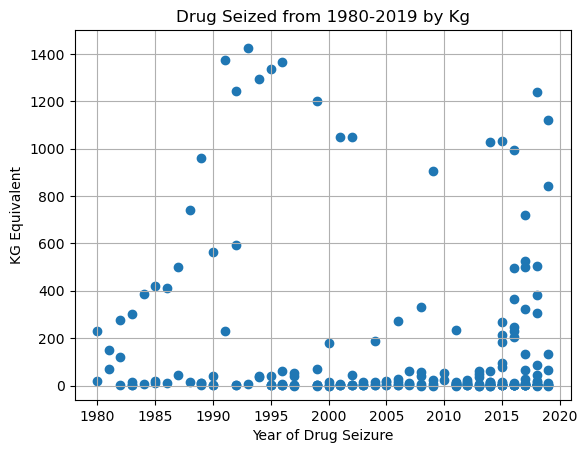

In [164]:
plt.scatter(us_opioids['Year of Drug Seizure'],us_opioids['KG Equivalent'])
plt.title('Drug Seized from 1980-2019 by Kg')
plt.ylim(-60,1500)
plt.xlabel('Year of Drug Seizure')
plt.ylabel('KG Equivalent')
plt.grid(True)
plt.show()